# 노드 9.날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명? [프로젝트]

## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [263]:
# 데이터 가져오기
# sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터 사용

In [264]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [265]:
df_X.shape

(442, 10)

In [266]:
# 442 개 데이타, 10개 항목

In [267]:
df_y.shape

(442,)

In [268]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [269]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [270]:
df_X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [271]:
df_y[:5]

array([151.,  75., 141., 206., 135.])

In [132]:
import pandas as pd
from sklearn.datasets import load_diabetes

data = load_diabetes()

df_X1 = pd.DataFrame(data.data, columns=data.feature_names)
df_y1 = pd.Series(data.target, name="target")


In [133]:
df = pd.concat([df_X1, df_y1], axis=1)

df.corr()["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [134]:
corr = df.corr()["target"]

selected_features = corr[abs(corr) >= 0.5].index
selected_features = selected_features.drop("target")

selected_features

Index(['bmi', 's5'], dtype='object')

In [135]:
feature_to_idx = {
    name: i for i, name in enumerate(data.feature_names)
}

idx = [feature_to_idx[f] for f in selected_features]

new_df_X = df_X[:, idx]

In [136]:
new_df_X[:5]

array([[ 0.06169621,  0.01990749],
       [-0.05147406, -0.06833155],
       [ 0.04445121,  0.00286131],
       [-0.01159501,  0.02268774],
       [-0.03638469, -0.03198764]])

In [137]:
new_df_X.shape

(442, 2)

In [272]:
# X, y 준비

In [273]:
import numpy as np

# X = np.array(new_df_X)  # new df
X = np.array(df_X)  # 원래 데이타로 진행 했습니다. (new df도 MSE값이 3,000이하가 안나와서 원래 데이타로 다시 진행)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [274]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [275]:
# train, test 분리

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [276]:
# train data 353 개 (80%)
# test data 89개 (20%)

In [363]:
# 모델 준비

# 입력 데이터 개수에 맞게 W와 b 준비
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [364]:
# 모델

def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [365]:
# 각각 X * W -> 합치고  -> 최종으로 b 더하고 -> 그 값을 리턴

In [366]:
# loss 정의

# MSE 사용

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    # mser = ((a - b) ** 2).mean() ** 0.5  # 문제가 mse 구하는 것이어서 mse로 진행 했습니다.
    return mse

In [367]:
# loss 정의

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [368]:
# model을 통해 예측값과 실제값에 대해 MSE 실행후 그 결과 리턴

In [369]:
# gradient 함수 구현

def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [370]:
# 기울기 구하기
# 미분을 이용해서 dW, db 구하기

In [371]:
# 하이퍼 파라메터 설정
LEARNING_RATE = 0.1  # 설정값 높임 (낮을경우 MSE 3000 이상 달성이 어려움)

In [372]:
# 모델 학습

%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 3001):  #  학습 횟수 늘림
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i < 100:
        if i % 10 == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))
    elif i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6256.9917
Iteration 20 : Loss 5912.8254
Iteration 30 : Loss 5836.1074
Iteration 40 : Loss 5764.7277
Iteration 50 : Loss 5695.5881
Iteration 60 : Loss 5628.5789
Iteration 70 : Loss 5563.6277
Iteration 80 : Loss 5500.6646
Iteration 90 : Loss 5439.6226
Iteration 100 : Loss 5380.4368
Iteration 200 : Loss 4877.9195
Iteration 300 : Loss 4504.2533
Iteration 400 : Loss 4222.7049
Iteration 500 : Loss 4007.4325
Iteration 600 : Loss 3840.2118
Iteration 700 : Loss 3708.1509
Iteration 800 : Loss 3602.0950
Iteration 900 : Loss 3515.5121
Iteration 1000 : Loss 3443.7142
Iteration 1100 : Loss 3383.3125
Iteration 1200 : Loss 3331.8366
Iteration 1300 : Loss 3287.4675
Iteration 1400 : Loss 3248.8497
Iteration 1500 : Loss 3214.9605
Iteration 1600 : Loss 3185.0163
Iteration 1700 : Loss 3158.4079
Iteration 1800 : Loss 3134.6538
Iteration 1900 : Loss 3113.3673
Iteration 2000 : Loss 3094.2328
Iteration 2100 : Loss 3076.9889
Iteration 2200 : Loss 3061.4161
Iteration 2300 : Loss 3047.3280
Ite

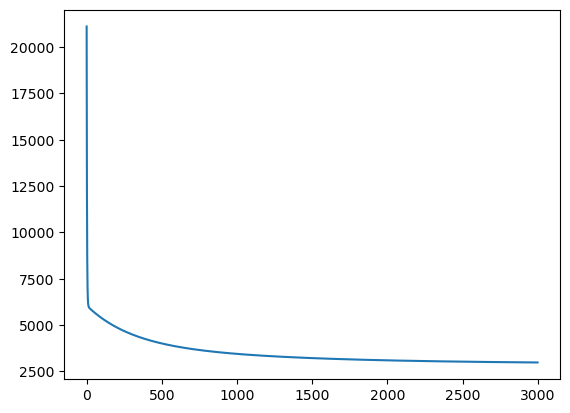

In [373]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [374]:
# test 로 성능 확인 (3,000 이하 확인)

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2870.435321189757)

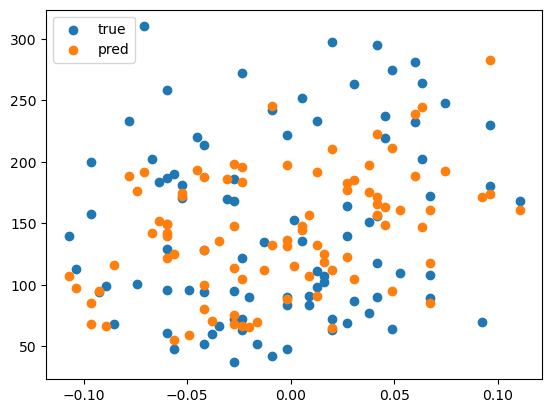

In [375]:
# 정답과 예측 데이터 시각화

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

In [376]:
# 예측 결과가 양호 

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [377]:
# 데이터 갖어오기

import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [378]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [379]:
# datatime 전처리 필요
# count가 y 값

In [380]:
# datatime 이용

train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

In [381]:
# datatime 이용해서 년, 월, 일, 시, 분, 초 양식으로 설정

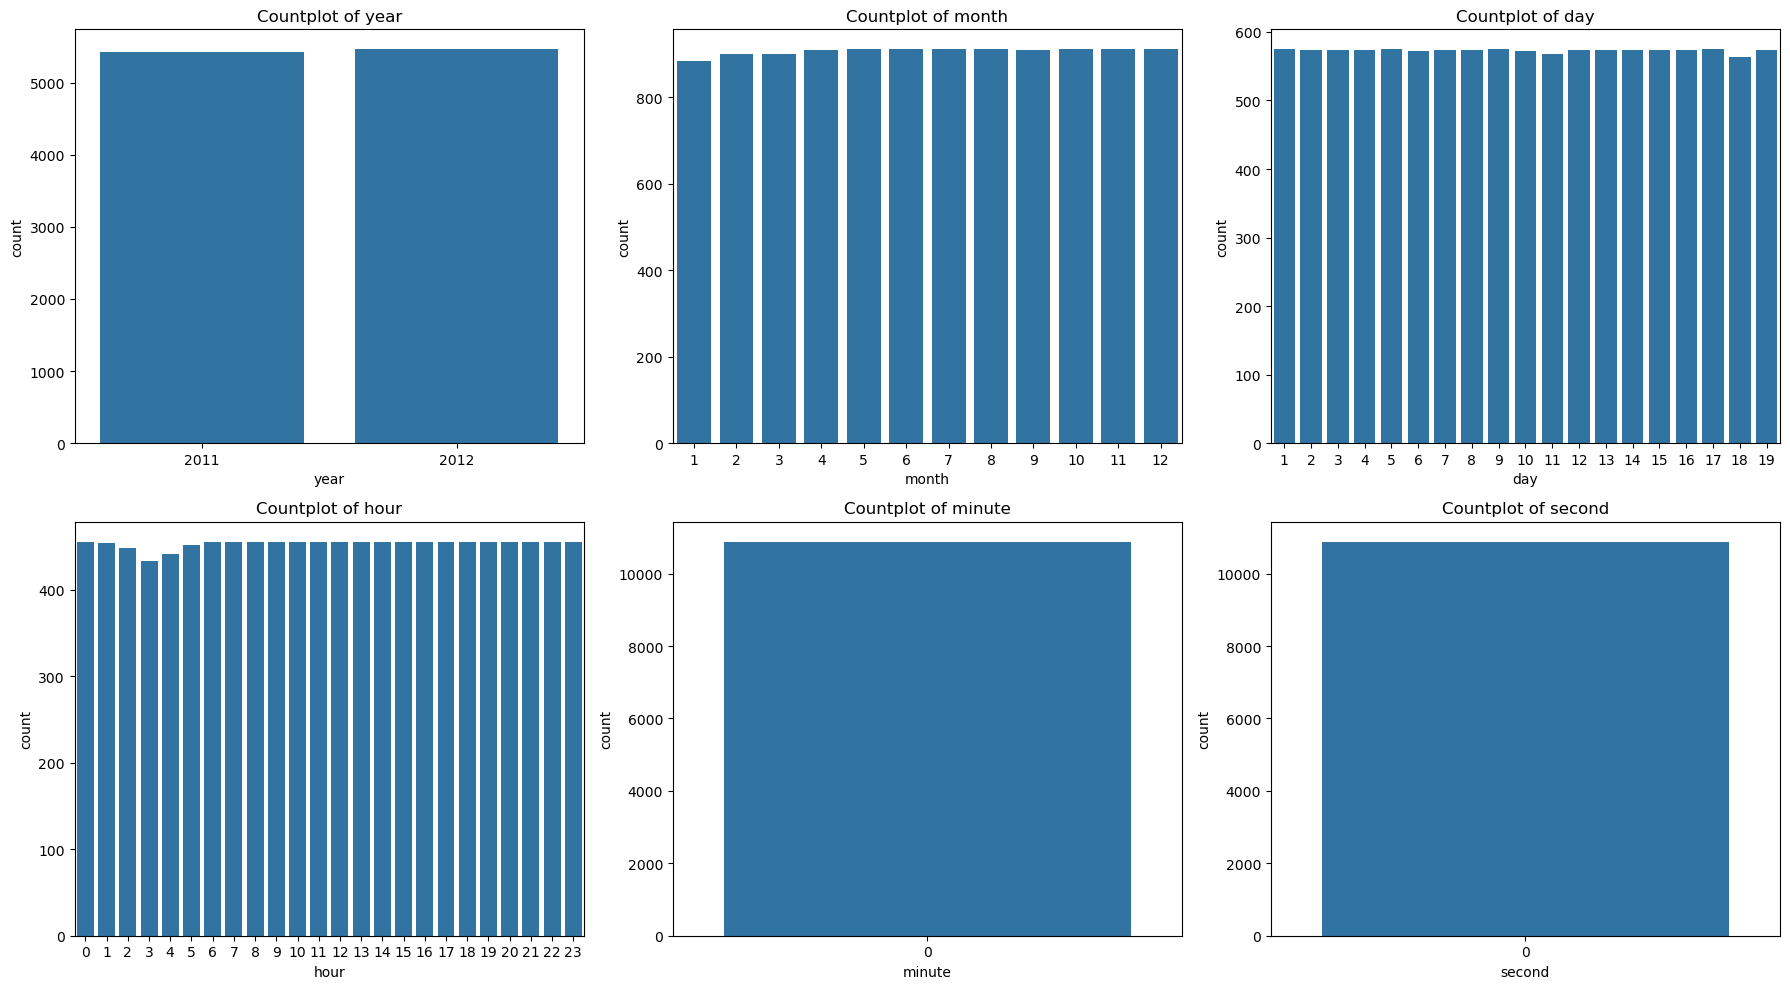

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [383]:
# 년, 월, 일, 시 별 데이터 변화 확인

In [384]:
# X, y 설정

In [385]:
corr = train.corr()
corr

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187,0.866570,0.494087,0.028563,-0.005663,NaN,NaN
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,NaN,NaN
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,NaN,NaN
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,NaN,NaN
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,NaN,NaN
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,NaN,NaN
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,NaN,NaN
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,NaN,NaN
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,NaN,NaN
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,NaN,NaN


In [386]:
corr_count = train.corr()["count"].sort_values(ascending=False)
corr_count

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
datetime      0.310187
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
minute             NaN
second             NaN
Name: count, dtype: float64

In [387]:
# count 에 대한 corr 확인

In [388]:
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']

X = train[features]
y = train['count']

In [389]:
# corr 에서 늦은 항목에 대해 festure 설정 (교과서)

In [390]:
# train/test 데이터 분리

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [391]:
# LinearRegression 모델

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [392]:
# X_test에 대한 예측값 출력 및 손실함수값 계산

from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19961.901814435438
RMSE: 141.2865946027274


In [393]:
# RMSE 값이 150 이하 달성함

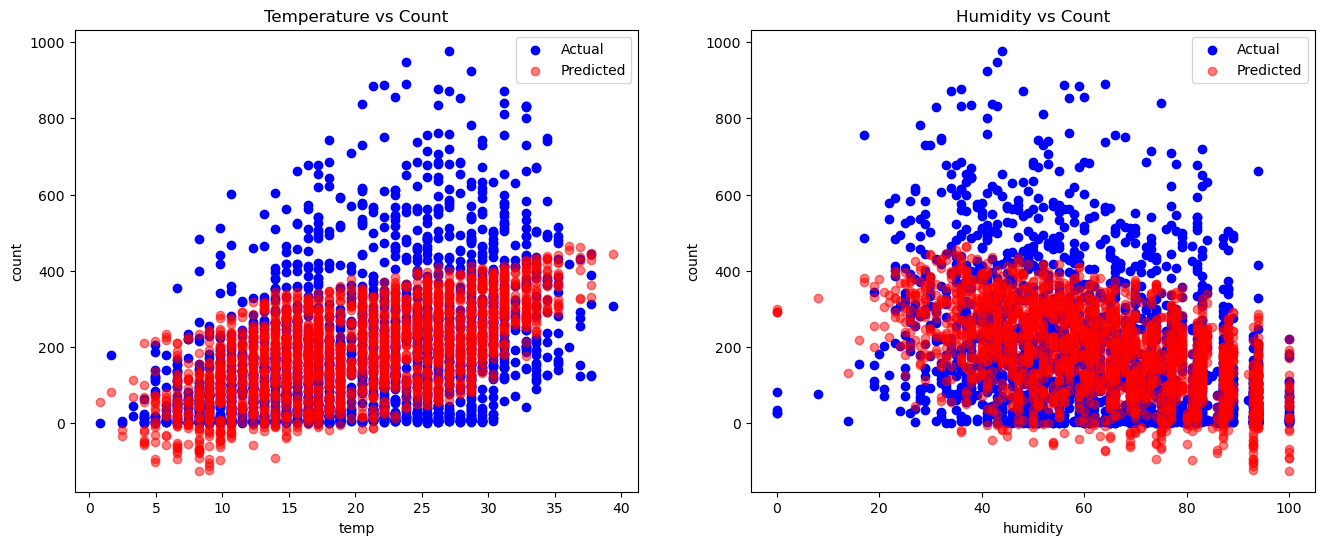

In [394]:
# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

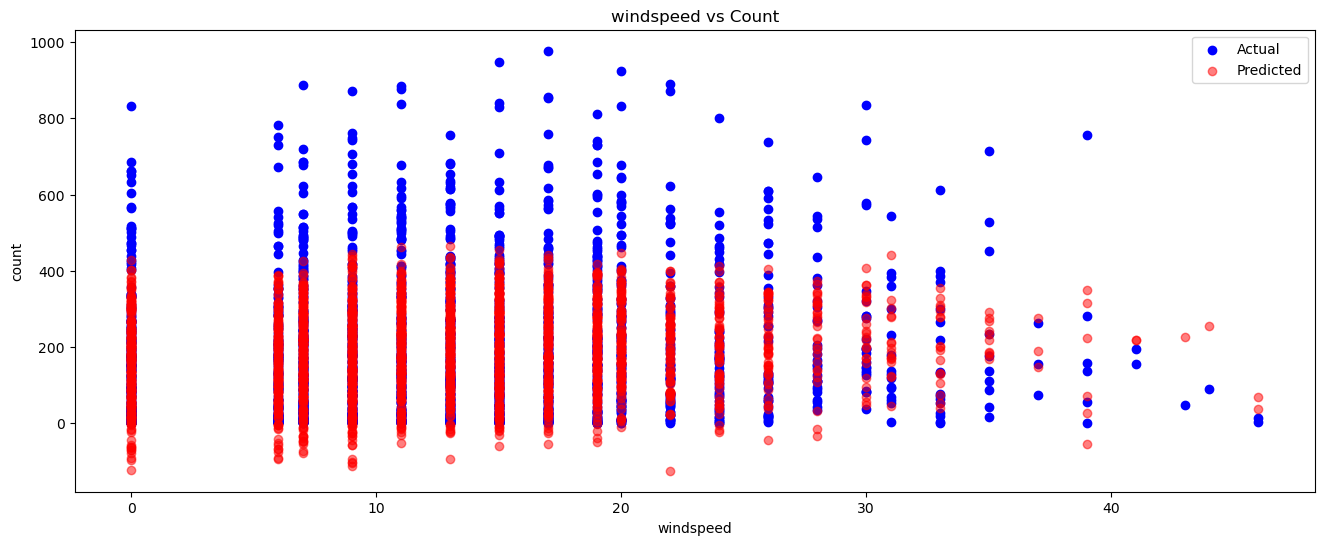

In [395]:
# humidity vs count 시각화
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
axs.scatter(X_test['windspeed'], y_test, color='blue', label='Actual')
axs.scatter(X_test['windspeed'], y_pred, color='red', label='Predicted', alpha=0.5)
axs.set_xlabel('windspeed')
axs.set_ylabel('count')
axs.set_title('windspeed vs Count')
axs.legend()

In [398]:
# temperature, humidity, windspeed 예측 정확도가 낮은것 같음
# corr 이 높은 registered, casual 로 다시 진행

In [399]:
features = ['year', 'month', 'day', 'hour', 'registered', 'casual']

X = train[features]
y = train['count']

In [400]:
# train/test 데이터 분리

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [401]:
# LinearRegression 모델

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [402]:
# X_test에 대한 예측값 출력 및 손실함수값 계산

from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 4.0009403067375184e-26
RMSE: 2.0002350628707413e-13


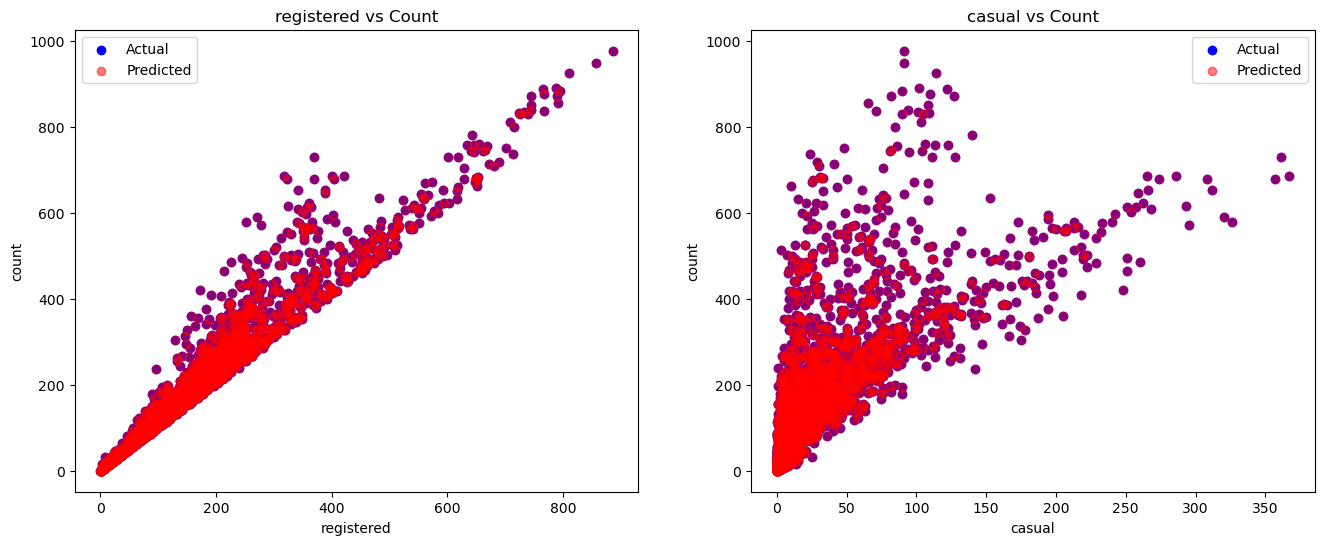

In [403]:
# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# registered vs count 시각화
axs[0].scatter(X_test['registered'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['registered'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('registered')
axs[0].set_ylabel('count')
axs[0].set_title('registered vs Count')
axs[0].legend()

# casual vs count 시각화
axs[1].scatter(X_test['casual'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['casual'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('casual')
axs[1].set_ylabel('count')
axs[1].set_title('casual vs Count')
axs[1].legend()

In [404]:
# 예측 결과가 양호함

- 이번 프로젝트를 하면서 느낀점, 배운점
  : 데이타 분석의 기본 내용을 학습한것 같습니다.
    단순히 sclearn 을 사용하는것도 좋지만, 그 밑바닥에 있는 내용을 학습하게되어 좋았습니다.
- 이번 프로젝트에서 잘 했다고 생각이 드는 점.
  : 코드를 조금 더 이해하고자 노력 했습니다. 이해 안되는 코드는 GPT 도움을 받으면서...
- 이번 프로젝트에서 느낀 문제점.
  : 눈으로 보면 이해가 되는데 막상 할려고 하면 모르겠다는것을 느끼면서 모르는게 너무 많은것 같아요
- 다음에는 이렇게 해야겠다 생각한 점.
  : 복습을 통해 좀더 이해를 높이고, 다음에 활용코자 합니다.